In [25]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy import ndimage
from six.moves import cPickle as pickle

In [26]:
train_filename = 'trainsetSimpleBig.tar.gz'
test_filename = 'trainsetSimpleTest.tar.gz'

In [27]:
# extracting the datasets
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

trainsetSimpleBig already present - Skipping extraction of trainsetSimpleBig.tar.gz.
['trainsetSimpleBig/0', 'trainsetSimpleBig/105', 'trainsetSimpleBig/135', 'trainsetSimpleBig/15', 'trainsetSimpleBig/165', 'trainsetSimpleBig/195', 'trainsetSimpleBig/225', 'trainsetSimpleBig/255', 'trainsetSimpleBig/45', 'trainsetSimpleBig/75']
trainsetSimpleTest already present - Skipping extraction of trainsetSimpleTest.tar.gz.
['trainsetSimpleTest/0', 'trainsetSimpleTest/105', 'trainsetSimpleTest/135', 'trainsetSimpleTest/15', 'trainsetSimpleTest/165', 'trainsetSimpleTest/195', 'trainsetSimpleTest/225', 'trainsetSimpleTest/255', 'trainsetSimpleTest/45', 'trainsetSimpleTest/75']


In [28]:
# have a look at data
import random
import hashlib

def disp_samples(data_folders, sample_size):
  for folder in data_folders:
    print(folder)
    image_files = os.listdir(folder)
    image_sample = random.sample(image_files, sample_size)
    for image in image_sample:
      image_file = os.path.join(folder, image)
      i = Image(filename=image_file)
      display(i)

In [29]:
disp_samples(train_folders, 1)

trainsetSimpleBig/0


trainsetSimpleBig/105


trainsetSimpleBig/135


trainsetSimpleBig/15


trainsetSimpleBig/165


trainsetSimpleBig/195


trainsetSimpleBig/225


trainsetSimpleBig/255


trainsetSimpleBig/45


trainsetSimpleBig/75


In [30]:
disp_samples(test_folders, 1)

trainsetSimpleTest/0


trainsetSimpleTest/105


trainsetSimpleTest/135


trainsetSimpleTest/15


trainsetSimpleTest/165


trainsetSimpleTest/195


trainsetSimpleTest/225


trainsetSimpleTest/255


trainsetSimpleTest/45


trainsetSimpleTest/75


In [ ]:
#Merging the data

image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
num_of_classes = 10

        
def Merge_folders(data_folders, size_per_class):
  dataset_names = []
  start_t = 0
  end_t = size_per_class
  required_size = size_per_class * num_of_classes
  trainDataset = np.ndarray((required_size, image_size, image_size), dtype=np.uint8)
  labelsDataset = np.ndarray(required_size, dtype=np.int32)
  for folder in data_folders:
    dataset_names.append(folder)

    print('Merging %s.' % folder)
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.uint8)
    image_index = 0
    for image in os.listdir(folder):
        if image_index < size_per_class:
            image_file = os.path.join(folder, image)
            image_data = (ndimage.imread(image_file).astype(int))
            dataset[image_index, :, :] = image_data
            image_index += 1
    num_images = image_index
    dataset = dataset[0:num_images, :, :]
    trainDataset[start_t:end_t, :, :] = dataset
    labelsDataset[start_t:end_t] = folder.split("/")[1]
    start_t += size_per_class
    end_t += size_per_class

  
  return dataset_names, trainDataset, labelsDataset

train_datasets, trainDataset, labelsTrainDataset = Merge_folders(train_folders, 140000)
test_datasets, testDataset, labelsTestDataset = Merge_folders(test_folders, 100)

print(trainDataset)
print(labelsTrainDataset)

print(testDataset)
print(labelsTestDataset)

print('trainDataset.shape' , trainDataset.shape)
print('labelsTrainDataset.shape' , labelsTrainDataset.shape)

print('testDataset.shape' , testDataset.shape)
print('labelsTestDataset.shape' , labelsTestDataset.shape)

Merging trainsetSimpleBig/0.
Merging trainsetSimpleBig/105.


In [ ]:
#test the data
rand_image = random.randint(0, 1400000)
print (rand_image)
plt.imshow(trainDataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (labelsTrainDataset[rand_image])
plt.show()
np.mean(trainDataset[rand_image])

In [9]:
# randomize the data
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(trainDataset, labelsTrainDataset)
test_dataset, test_labels = randomize(testDataset, labelsTestDataset)

28014
195


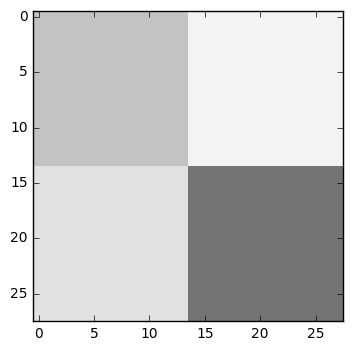

195.0

In [10]:
#test the data
rand_image = random.randint(0, 100000)
print (rand_image)
plt.imshow(train_dataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (train_labels[rand_image])
plt.show()
np.mean(train_dataset[rand_image])

901
135


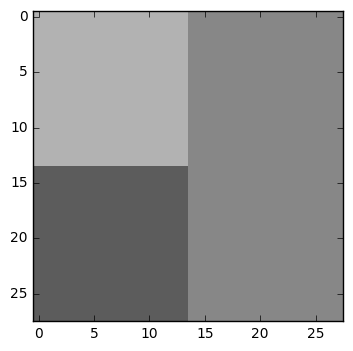

135.0

In [11]:
#test the data
rand_image = random.randint(0, 1000)
print (rand_image)
plt.imshow(test_dataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (test_labels[rand_image])
plt.show()
np.mean(test_dataset[rand_image])

In [12]:
# save the data
pickle_file = 'brData10ClassSimple.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [13]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 79588342


In [14]:
#estimate the duplicates

all_data = pickle.load(open('brData10ClassSimple.pickle', 'rb'))

def count_duplicates(dataset1, dataset2):
    hashes = [hashlib.sha1(x).hexdigest() for x in dataset1]
    dup_indices = []
    for i in range(0, len(dataset2)):
        if hashlib.sha1(dataset2[i]).hexdigest() in hashes:
            dup_indices.append(i)
    return len(dup_indices)


print(count_duplicates(all_data['test_dataset'], all_data['train_dataset']))

36898


In [15]:
# test a regression model

train_dataset = all_data['train_dataset']
train_labels = all_data['train_labels']
test_dataset = all_data['test_dataset']
test_labels = all_data['test_labels']

print (len(train_dataset))
print (len(train_labels))
print (len(test_dataset))
print (len(test_labels))

100000
100000
1000
1000


In [16]:

def get_score(train_dataset, train_labels, test_dataset, test_labels):
    model = LogisticRegression()
    train_flatten_dataset = np.array([x.flatten() for x in train_dataset])
    test_flatten_dataset = np.array([x.flatten() for x in test_dataset])
    model.fit(train_flatten_dataset, train_labels)

    return model.score([x.flatten() for x in test_dataset], test_labels)

print("100 trainsamples score: " + str(get_score(train_dataset[:100], train_labels[:100], test_dataset, test_labels)))
print("1000 trainsamples score: " + str(get_score(train_dataset[:1000], train_labels[:1000], test_dataset, test_labels)))
print("5000 trainsamples score: " + str(get_score(train_dataset[:5000], train_labels[:5000], test_dataset, test_labels)))
print("10000 trainsamples score: " + str(get_score(train_dataset[:10000], train_labels[:10000], test_dataset, test_labels)))


100 trainsamples score: 0.448
1000 trainsamples score: 0.515
5000 trainsamples score: 0.558
10000 trainsamples score: 0.598
